# FIR Delay Effect - Signal Processing 2024/2025

### Author: Pablo Mollá

Before jumping straight to solving the lab, let's explain what we are using.

## Theory

### A. What is the FIR Delay Effect?

An $\fbox{FIR (Finite Impulse Response) Delay Effect}$ is a $\textcolor{red}{\text{simple audio signal processing}}$ $\textcolor{red}{\text{technique that introduces a time delay}}$ to an input signal and then combines it with the original signal. In mathematical terms, the output signal $s[t]$ is given by:

$$
\textcolor{red}{\text{s}}[t] = \textcolor{blue}{\text{e}}[t] + \textcolor{green}{\alpha} \cdot \textcolor{blue}{\text{e}}[t - \textcolor{orange}{\text{D}}]
$$

Where:
- $\textcolor{blue}{\text{e}}[t]$ is the input signal at time $t$,
- $\textcolor{red}{\text{s}}[t]$ is the output signal,
- $\textcolor{green}{\alpha}$ is an attenuation factor (a value between 0 and 1 that controls how much of the delayed signal is added),
- $\textcolor{orange}{\text{D}}$ is the delay, measured in samples (or time steps in digital systems).

### B. FIR Filter Concept:

The term $\fbox{FIR}$ comes from the fact that the filter's impulse response is of finite length. Unlike IIR (Infinite Impulse Response) filters, an FIR filter has no feedback and will "die out" after a certain amount of time. The delayed signal gets scaled by $\alpha$, and after $D$ time steps, the contribution of the delayed version of the signal stops influencing future outputs.

#### B.1. Key Components:

1. $\textbf{Original Signal}$ $\textcolor{blue}{\text{e}}[t]$: This is the unaltered input audio signal.

2. $\textbf{Delayed Signal}$ $\textcolor{blue}{\text{e}}[t-D]$: The same input signal delayed by $\textcolor{orange}{\text{D}}$ samples.

3. $\textbf{Attenuation}$ $\textcolor{green}{\alpha}$: Controls how much of the delayed signal is mixed back into the original signal. If $\textcolor{green}{\alpha} = 0$, no delay is applied. Larger values of $\textcolor{green}{\alpha}$ produce a more pronounced echo.

4. $\textbf{Delay Time}$ $\textcolor{orange}{\text{D}}$: Determines how many samples (or how much time) the delayed signal is shifted. A larger $\textcolor{orange}{\text{D}}$ introduces a longer delay.

### C. Real-World Applications of the FIR Delay Effect

1. $\fbox{Echo and Reverb in Audio Production}$:

   The most common use of the FIR delay effect is to create echoes or reverberations in audio. When a sound is played in a space, it reflects off surfaces like walls and objects. In audio processing, this reflection can be simulated using delay effects. Depending on the delay time and attenuation:
   - $\textbf{Short Delays}$ (~50-100 ms) create reverb effects, where the delayed signal blends smoothly with the original, making the sound seem like it's coming from a larger space (like a hall or room).
   - $\textbf{Long Delays}$ (~500 ms or more) produce noticeable echoes, where the repeated sound is distinctly heard after the original.

2. $\fbox{Guitar and Instrument Effects}$:

   Musicians often use delay pedals or software plugins to add depth to their instrument sounds. By introducing a delayed version of the sound, they can create complex layers of sound, enhance solos, or make the music more atmospheric. It's a staple in genres like rock, ambient, and electronic music.

3. $\fbox{Sound Localization}$:

   In audio systems designed for 3D sound (like surround sound or virtual reality audio), delays are used to simulate how sound arrives at different points in space. By delaying sound to different speakers or headphones, listeners perceive sound coming from different directions.

4. $\fbox{Communications Systems}$:

   In digital communication systems, delay filters are often used to model propagation delays in signal transmission, especially over long distances. This can be useful in simulating and testing how signals degrade or interfere with each other in a communication channel.

5. $\fbox{Digital Signal Processing (DSP) in Telecommunications}$:
   In some telecommunications applications, FIR delay filters are used to introduce controlled delays to signals to manage timing synchronization or mitigate interference caused by reflections in transmission channels.

6. $\fbox{Control Systems}$:

   In certain control systems (e.g., robotics, industrial processes), FIR filters with delay can be used to smooth sensor data or predict future states based on past data, helping to control timing-sensitive actions.


### D. What is the Impulse Response of the filter?

The $\fbox{impulse response}$ of a filter is the output of the system when the input is a discrete-time impulse signal (also called a Dirac delta function). This impulse signal is a sequence where the first sample is 1 and all subsequent samples are 0:

$$
\delta[t] = \begin{cases} 1 & t = 0 \\ 0 & t \neq 0 \end{cases}
$$

In the context of the delay filter $s[t] = e[t] + \alpha e[t - D]$, $\textcolor{red}{\text{the impulse response tells us how}}$ $\textcolor{red}{\text{the filter behaves over time}}$ when responding to a single "click" or spike of energy at time $t = 0$. It is important because it characterizes the time-domain behavior of the filter.

For the delay filter:
- At $t = 0$, the output is 1 (the same as the input).
- At $t = D$ (the delay), the output is $\alpha$ (the delayed and attenuated response).
- For all other $t$, the output is 0.


### E. What is the Frequency Response of the filter?

The $\fbox{frequency response}$ of a filter $\textcolor{red}{\text{tells us how the filter affects different frequency}}$ $\textcolor{red}{\text{components of a signal}}$. It can be computed by taking the Fourier Transform of the filter's impulse response. The frequency response shows how the filter modifies the amplitude and phase of each frequency component in the input signal.

For a delay filter, the frequency response can be computed by at first determining the impulse response and then obtaining the Fourier Transform of it.

## 0. Libraries

In [96]:
import os
import glob
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from IPython.display import Audio

## 1. Loading the Data

In [97]:
# Load the wav file (change the file path to your file)
files_path_list = ['Lab_1/data/music.wav', 'Lab_1/data/noise1.wav', 'Lab_1/data/noise2.wav', 'Lab_1/data/noise3.wav','Lab_1/data/string_1.wav', 'Lab_1/data/string_2.wav', 'Lab_1/data/string_3.wav']
loaded_files_list = []

for file_path in files_path_list:
    data, sample_rate = librosa.load(file_path, sr=None)
    file_name = os.path.basename(file_path)
    loaded_files_list.append([data, sample_rate, file_name])

# Example to listen: string_1.wav
file_path = files_path_list[4]
file_name = os.path.basename(file_path)
data, sample_rate = librosa.load(file_path, sr=None)

# Print sample rate and data shape
print(f"Sample Rate: {sample_rate} Hz")
print(f"Data Shape: {data.shape}")

# Play the audio (optional)
Audio(data, rate=sample_rate)

Sample Rate: 44100 Hz
Data Shape: (237568,)


## 2. Parameters for the Delay Effect: Attenuation Factor & Delay Time

In [98]:
# Attenuation Factor
alpha = 0.5

# Delay Time in seconds
D_in_secs = 0.1

# Delay Time in samples
D_in_samples = int(D_in_secs * sample_rate)
print(f"Delay in samples: {D_in_samples}")

Delay in samples: 4410


## 3. Application of delayed signal in the time domain

In [119]:
# Function to apply delay with extended signal length and normalization
def apply_delay_with_normalization(input_signal, D_in_samples, alpha):
    # Extend the output signal by D samples
    output_length = len(input_signal) + D_in_samples
    delayed_signal = np.zeros(output_length)

    print("Original Shape:", input_signal.shape)
    print("Delayed Shape:", delayed_signal.shape)
    
    # Add the original signal to the first part of the output signal
    delayed_signal[:len(input_signal)] += input_signal
    
    # Add the delayed version of the signal, starting from index D
    delayed_signal[D_in_samples:D_in_samples + len(input_signal)] += alpha * input_signal
    
    # Normalize the signal to avoid clipping (scale to range [-1, 1]): OPTIONAL
    #delayed_signal = delayed_signal / np.max(np.abs(delayed_signal))
    
    return delayed_signal

In [110]:
# Listen to the original and delayed audio
print("Original Audio:")
Audio(data, rate=sample_rate)

Original Audio:


In [111]:
# Apply the delay effect
delayed_data = apply_delay_with_normalization(data, D_in_samples, alpha)

print("Delayed Audio:")
Audio(delayed_data, rate=sample_rate)

# Save delayed audio to file (optional)
#sf.write('delayed_audio.wav', delayed_data, sample_rate)

Original Shape: (237568,)
Delayed Shape: (241978,)
Delayed Audio:


## 4. Plotting Original and Delayed signals

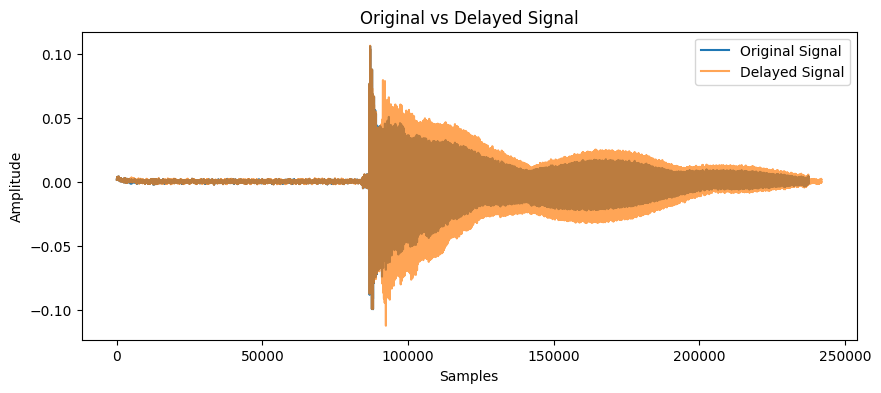

In [112]:
# Plot original and delayed signals
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original Signal')
plt.plot(delayed_data, label='Delayed Signal', alpha=0.7)
plt.title("Original vs Delayed Signal")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## 5. Computing the Impulse Response of the filter

In [124]:
# Function to compute the impulse response
def compute_impulse_response(D, alpha, impulse_length=30000):
    # Create an impulse signal (length: impulse_length)
    impulse = np.zeros(impulse_length)
    
    # The impulse is a 1 at t = 0 and 0 everywhere else
    impulse[0] = 1

    # Apply delay to the impulse signal
    impulse_response = apply_delay_with_normalization(impulse, D, alpha)
    
    return impulse_response

# Compute the impulse response of the filter
impulse_response = compute_impulse_response(D_in_samples, alpha)

Original Shape: (30000,)
Delayed Shape: (34410,)


### 5.1. Plotting the Impulse Response

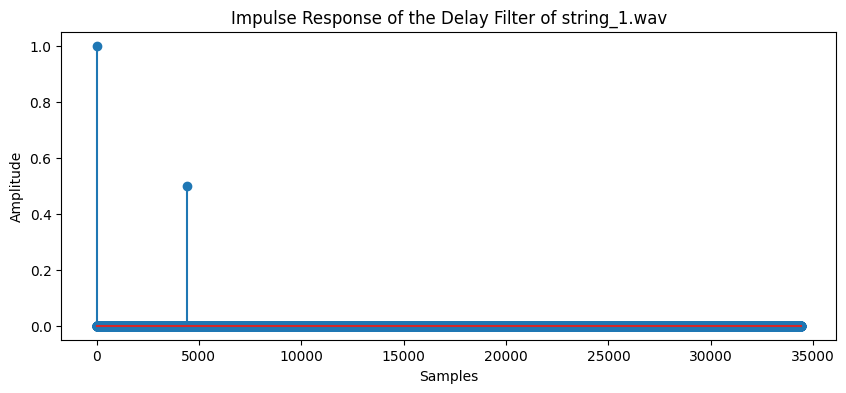

In [125]:
# Plot the impulse response
plt.figure(figsize=(10, 4))
plt.stem(impulse_response)
plt.title(f"Impulse Response of the Delay Filter of {file_name}")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

- The first spike at the origin represents the direct impulse response with an amplitude of 1 at $t = 0$. A second spike at 4410 samples indicates the delayed signal, with an amplitude of 0.5 due to an attenuation factor of $\alpha = 0.5$. 

- Between the spikes, the amplitude is zero, illustrating the FIR delay filter's behavior of producing an initial impulse at $t = 0$ followed by a delayed version. There are no further spikes in the impulse response of the FIR delay filter after the two described. The response consists solely of the initial spike at the origin and the delayed spike, with the amplitude remaining zero in between. This behavior indicates that the FIR filter produces only the original impulse and its delayed version, with no additional contributions.

## 6. Computing the Frequency Response of the filter

In [115]:
# Function to compute the frequency response
def compute_frequency_response(impulse_response, sample_rate):
    # Compute FFT of the impulse response
    N = len(impulse_response)
    freq_response = fft(impulse_response)
    freqs = fftfreq(N, 1 / sample_rate)
    
    # Return only positive frequencies
    positive_freqs = freqs[:N//2]
    magnitude_response = np.abs(freq_response[:N//2])
    phase_response = np.angle(freq_response[:N//2])
    
    return positive_freqs, magnitude_response, phase_response

# Compute the frequency response of the filter
positive_freqs, magnitude_response, phase_response = compute_frequency_response(impulse_response, sample_rate)

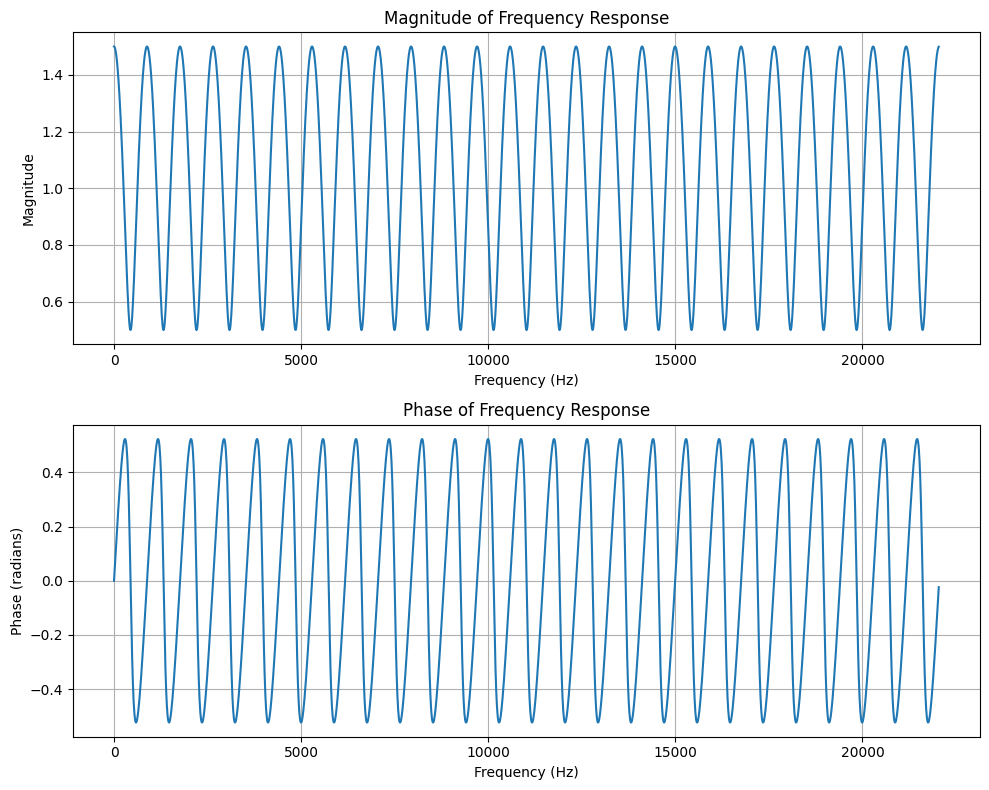

In [116]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(positive_freqs, magnitude_response)
plt.title('Magnitude of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(positive_freqs, phase_response)
plt.title('Phase of Frequency Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
